In [1]:
import cv2
import statistics
from matplotlib import pyplot as plt  

In [2]:
def hist_Match(img,rows,col):
    count=0
    p=[]
#hitogram creation
    for k in range(256):
        for i in range(rows):
            for j in range(col):
                if(img[i,j]==k):
                    count=count+1
        p.append(count)
        count=0
#normalisation of hitogram data
    s=0
    for i in range(len(p)):
        s=s+p[i]
    for i in range(len(p)):
        p[i]=p[i]/s
#cummulation of normalised data
    c=0
    s1=[]
    for i in range(len(p)):
        s1.append(p[i]+c)
        c=s1[i]
        s1[i]=round(s1[i]*255)
#increase contrast        
    for i in range(rows):
        for j in range(col):
            r=img[i,j]
            img[i,j]=s1[r]
    return img,s1

In [3]:
img1Dark=cv2.imread("pout-dark.jpg",0)
imgDark=cv2.imread("pout-dark.jpg",0)

ro,co=imgDark.shape
imDark,s1=hist_Match(imgDark,ro,co)
#plt.title('pout-dark')
#plt.imshow(cv2.cvtColor(img1Dark, cv2.COLOR_BGR2RGB))
#plt.show()

imgRef=cv2.imread("pout-bright.jpg",0)
rows1,col1=imgRef.shape
#plt.title('pout-bright')
#plt.imshow(cv2.cvtColor(imgRef, cv2.COLOR_BGR2RGB))
#plt.show()
imRef,v=hist_Match(imgRef,ro,co)

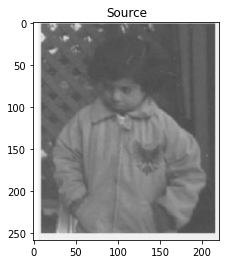

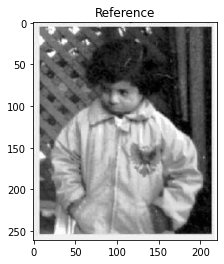

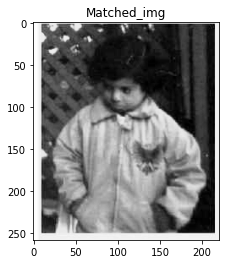

In [4]:
arr=[]
m=[]#set of min values

k=0
for i in range(ro):
    for j in range(co):
        for k in range(len(v)):
            if imDark[i,j]==v[k]:
                arr.append(k)
        if len(arr)==0:        
            for l in range(len(v)): 
                m.append(abs(imDark[i,j]-v[l]))
            mi=min(m)
            for n in range(len(m)):
                if mi==m[n]:
                    arr.append(n)
        imgDark[i,j] =round(statistics.median(arr))
        arr=[]
        m=[]
        
plt.title('Source')
plt.imshow(cv2.cvtColor(img1Dark, cv2.COLOR_BGR2RGB))
plt.show()

plt.title('Reference')
plt.imshow(cv2.cvtColor(imRef, cv2.COLOR_BGR2RGB))
plt.show()

plt.title('Matched_img')
plt.imshow(cv2.cvtColor(imgDark, cv2.COLOR_BGR2RGB))
plt.show()